## Initialisations and definitions

In [43]:
##Imports
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.linear_model import LinearRegression



In [44]:
## Initialisations: quantities and domain
#Watch out to the Unit of t and x (dimensionnalisation)

T = 100 #Time in (1/nu) seconds
L_x = 2*np.pi #Length of the 1D domain in 1/sqrt(nu) meters
epsilon = 0
nu = 1/4 + epsilon  #nu = 4pi²/L² in m-2

#Number of space/time point, space/time steps
N_x = 100 #Number of space point
N_t = 100*N_x #Number of time point
dx = L_x/(N_x-1) #N_x-1 space interval 
dt = T/(N_t-1) #N_t -1 time interval
print("NB OF SPACE AND TIME POINTS:", N_x, N_t)
print("Time T:", T)

NB OF SPACE AND TIME POINTS: 100 10000
Time T: 100


In [45]:
##Initial conditions & Domain
#Somes functions to use for Initial Condition
def sincos(x, _h_mean, _ampl_c, _ampl_s, _freq_c, _freq_s):
    return _h_mean + _ampl_c*np.cos(_freq_c*x) + _ampl_s*np.sin(_freq_s*x) #Initial condition. (sinus, periodic on D)
def Poly_1(x, n_1, n_2, n_3):
    return ((x-1)**n_1)*(x**n_2)*((x-L_x)**n_3)


#Domain
Domain_x = np.linspace(0, L_x, N_x, endpoint=False) #Periodic domain: we don't nee the last point (endpoint=False)
print("First and last point of the domain:", Domain_x[0], Domain_x[-1])
print("2pi-dx:", 2*np.pi-dx)


#initial condition
h_mat = np.zeros((N_t, N_x)) #Matrix of the height. Each line is for a given time from 0 to (N_t-1)*dt
h_mean = 0
ampl_c, ampl_s = 0, 1
freq_c, freq_s= 1, 1 #need to be a relative to have periodicity
h_mat[0,:] = sincos(Domain_x, h_mean, ampl_c, ampl_s, freq_c, freq_s)
# h_mat[0,:] =Poly_1(D, 1, 1, 1)


First and last point of the domain: 0.0 6.220353454107791
2pi-dx: 6.219718788925247


## Fourier method

### Definitions and visualisation


 Shape of the array of frequencies:  (51,)
[ 1.00000000e+00  9.98026728e-01  9.92114701e-01  9.82287251e-01
  9.68583161e-01  9.51056516e-01  9.29776486e-01  9.04827052e-01
  8.76306680e-01  8.44327926e-01  8.09016994e-01  7.70513243e-01
  7.28968627e-01  6.84547106e-01  6.37423990e-01  5.87785252e-01
  5.35826795e-01  4.81753674e-01  4.25779292e-01  3.68124553e-01
  3.09016994e-01  2.48689887e-01  1.87381315e-01  1.25333234e-01
  6.27905195e-02 -1.10134124e-15 -6.27905195e-02 -1.25333234e-01
 -1.87381315e-01 -2.48689887e-01 -3.09016994e-01 -3.68124553e-01
 -4.25779292e-01 -4.81753674e-01 -5.35826795e-01 -5.87785252e-01
 -6.37423990e-01 -6.84547106e-01 -7.28968627e-01 -7.70513243e-01
 -8.09016994e-01 -8.44327926e-01 -8.76306680e-01 -9.04827052e-01
 -9.29776486e-01 -9.51056516e-01 -9.68583161e-01 -9.82287251e-01
 -9.92114701e-01 -9.98026728e-01 -1.00000000e+00 -9.98026728e-01
 -9.92114701e-01 -9.82287251e-01 -9.68583161e-01 -9.51056516e-01
 -9.29776486e-01 -9.04827052e-01 -8.76306680e-

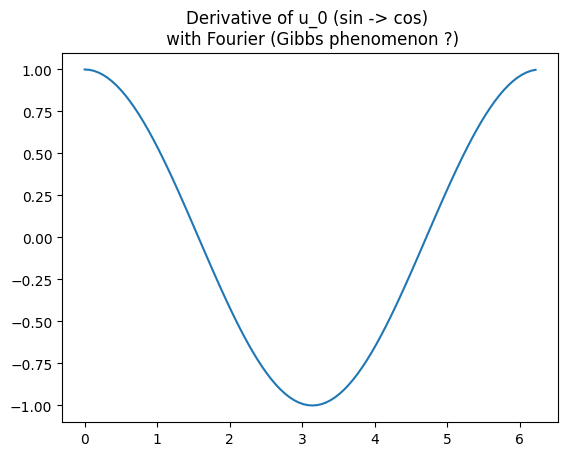

[-5.12548256e-14 -6.27905195e-02 -1.25333234e-01 -1.87381315e-01
 -2.48689887e-01 -3.09016994e-01 -3.68124553e-01 -4.25779292e-01
 -4.81753674e-01 -5.35826795e-01 -5.87785252e-01 -6.37423990e-01
 -6.84547106e-01 -7.28968627e-01 -7.70513243e-01 -8.09016994e-01
 -8.44327926e-01 -8.76306680e-01 -9.04827052e-01 -9.29776486e-01
 -9.51056516e-01 -9.68583161e-01 -9.82287251e-01 -9.92114701e-01
 -9.98026728e-01 -1.00000000e+00 -9.98026728e-01 -9.92114701e-01
 -9.82287251e-01 -9.68583161e-01 -9.51056516e-01 -9.29776486e-01
 -9.04827052e-01 -8.76306680e-01 -8.44327926e-01 -8.09016994e-01
 -7.70513243e-01 -7.28968627e-01 -6.84547106e-01 -6.37423990e-01
 -5.87785252e-01 -5.35826795e-01 -4.81753674e-01 -4.25779292e-01
 -3.68124553e-01 -3.09016994e-01 -2.48689887e-01 -1.87381315e-01
 -1.25333234e-01 -6.27905195e-02  2.34479103e-13  6.27905195e-02
  1.25333234e-01  1.87381315e-01  2.48689887e-01  3.09016994e-01
  3.68124553e-01  4.25779292e-01  4.81753674e-01  5.35826795e-01
  5.87785252e-01  6.37423

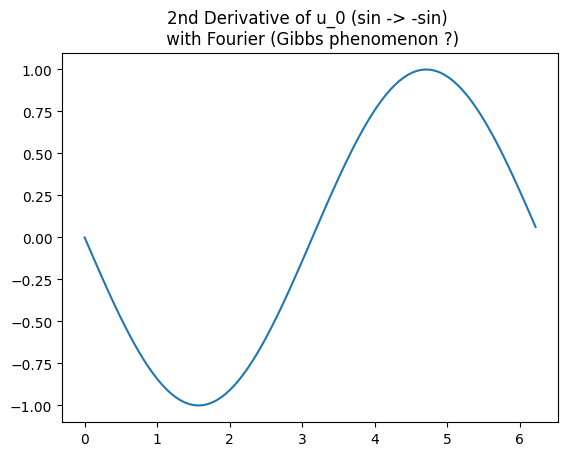

[ 2.37656685e-10  6.27905194e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968628e-01  7.70513243e-01  8.09016995e-01
  8.44327925e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01  1.00000000e+00  9.98026728e-01  9.92114702e-01
  9.82287250e-01  9.68583161e-01  9.51056516e-01  9.29776486e-01
  9.04827052e-01  8.76306680e-01  8.44327925e-01  8.09016995e-01
  7.70513243e-01  7.28968627e-01  6.84547106e-01  6.37423990e-01
  5.87785252e-01  5.35826795e-01  4.81753674e-01  4.25779291e-01
  3.68124553e-01  3.09016994e-01  2.48689887e-01  1.87381315e-01
  1.25333233e-01  6.27905199e-02 -4.15132746e-10 -6.27905192e-02
 -1.25333234e-01 -1.87381314e-01 -2.48689887e-01 -3.09016994e-01
 -3.68124553e-01 -4.25779291e-01 -4.81753675e-01 -5.35826795e-01
 -5.87785252e-01 -6.37423

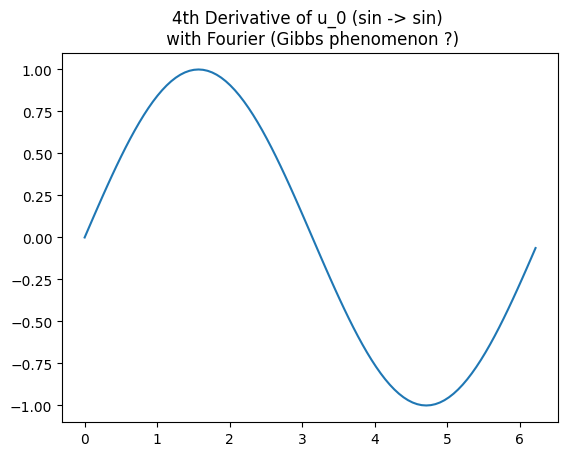


Shape of the Fourier matrix: (10000, 51)

 Mean of the initial Function: (-1.5265566588595903e-18+0j)

 Shape of Hc and H_s:  (50,)


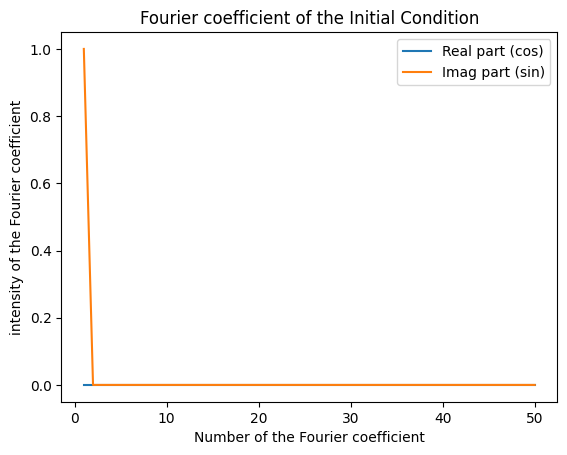

In [46]:
### Definitions and visualisation of the FFT


##Some test about DFT
#Test of the differentiation with DFT 
fq_tab = N_x*np.fft.rfftfreq(N_x) #to justify better after
print("\n Shape of the array of frequencies: ", fq_tab.shape)
if True:
    U_x = np.fft.irfft( (1j *fq_tab)*np.fft.rfft(h_mat[0, :]))
    print(U_x.real)
    plt.plot(Domain_x, U_x.real)
    plt.title("Derivative of u_0 (sin -> cos) \n with Fourier (Gibbs phenomenon ?)")
    plt.show()

    U_xx = np.fft.irfft( (1j *fq_tab)**2*np.fft.rfft(h_mat[0, :]))
    print(U_xx)
    plt.plot(Domain_x, U_xx.real)
    plt.title("2nd Derivative of u_0 (sin -> -sin) \n with Fourier (Gibbs phenomenon ?)")
    plt.show()

    U_xxxx = np.fft.irfft( (1j *fq_tab)**4*np.fft.rfft(h_mat[0, :]))
    print(U_xxxx)
    plt.plot(Domain_x, U_xxxx.real)
    plt.title("4th Derivative of u_0 (sin -> sin) \n with Fourier (Gibbs phenomenon ?)")
    plt.show()



##Definition of the Fourier coefficients H_c & H_s
#Fourier matrix
h_Fourier_mat = np.zeros((N_t, len(fq_tab)), dtype=complex)
h_Fourier_mat[0, :] = np.fft.rfft(h_mat[0, :], norm="forward") #scaled to Forward to have a mean at the first coefficient
print("\nShape of the Fourier matrix:", h_Fourier_mat.shape)

#H_c & H_s Coefficients (like the paper)
print("\n Mean of the initial Function:", h_Fourier_mat[0, 0])
H_c = 2*h_Fourier_mat[0, 1:].real  #See the Obsidian file for justification.
H_s = -2*h_Fourier_mat[0, 1:].imag 
print("\n Shape of Hc and H_s: ", H_c.shape)
M = len(H_c) #Order of trucation


#plot of the IC in frequency domain
plt.plot(fq_tab[1:], H_c, label="Real part (cos)")
plt.plot(fq_tab[1:], H_s, label="Imag part (sin)")
plt.xlabel("Number of the Fourier coefficient")
plt.ylabel("intensity of the Fourier coefficient")
plt.legend()
plt.title("Fourier coefficient of the Initial Condition") #verification for the sinus IC 
plt.show()

In [47]:
##Computation of the non linearity F + Some tests


def F_slow(H_c, H_s, _M=M):
    F_c = np.zeros(_M)
    F_s = np.zeros(_M)

    for j in range(1, _M+1):
        for m in range(1, _M+1):
            for n in range(1, _M+1): 
                if (m+n == j ):
                    F_c[j-1] -= H_c[m-1]*H_s[n-1]
                    F_s[j-1] += (H_c[m-1]*H_c[n-1] - H_s[m-1]*H_s[n-1])/2
                elif (m-n == j):
                    F_c[j-1] += H_c[m-1]*H_s[n-1] - H_c[n-1]*H_s[m-1]
                    F_s[j-1] += H_c[m-1]*H_c[n-1] + H_s[m-1]*H_s[n-1]
        F_c[j-1] = F_c[j-1]*j/2
        F_s[j-1] = F_s[j-1]*j/2
    
    return F_c, F_s

def F(H_c, H_s, _M=M):
    '''Computes the non linear part of the fourier transform of the KS equation (Cf LINEARLY 
    IMPLICIT METHODS FOR PARABOLIC SYSTEMS (G.Akrivis, D.Papageorgiou)).
    - We suppose here that the mean value of the fct is always 0, like the paper. Hence we manipulate only H_s and H_c'

    -input: H_c, H_s: np.array of size _M. Fourier coef of the height of the fluid.
    -output: (F_c, F_s), 2 np.array of size _M which are the non lin part of the cos and sin resp.
    '''
    F_c = np.zeros(_M)
    F_s = np.zeros(_M)

    # Use broadcasting to calculate H_c * H_s and H_c * H_c and H_s * H_s
    H_c_matrix = H_c[:, None]  # Convert to column vector
    H_s_matrix = H_s[:, None]  # Convert to column vector

    H_c_H_s = H_c_matrix * H_s_matrix.T
    H_s_H_c = H_s_matrix * H_c_matrix.T
    H_c_H_c = H_c_matrix * H_c_matrix.T
    H_s_H_s = H_s_matrix * H_s_matrix.T

    m_indices = np.arange(1, _M+1)
    n_indices = np.arange(1, _M+1)

    for j in range(1, _M+1):
        # Find m+n == j
        mask1 = m_indices[None, :] + n_indices[:, None] == j  # Shape (_M+1, _M+1)
        F_s[j-1] += np.sum( (H_c_H_c - H_s_H_s) * mask1)/2
        F_c[j-1] -= np.sum(H_c_H_s* mask1)
        
        # Find m-n == j
        mask2 = m_indices[:, None] - n_indices[None, :] == j  # Shape (_M+1, _M+1)
        F_s[j-1] += np.sum( (H_c_H_c + H_s_H_s) * mask2)
        F_c[j-1] += np.sum( (H_c_H_s - H_s_H_c) * mask2) #watch out: the summation isn't symetric i.e the order of the indices m&n is important

        # Apply the scaling
        F_c[j-1] *= j / 2
        F_s[j-1] *= j / 2

    return F_c, F_s


#Tests of F
print("COMPUTATION TESTS of F (cf calculus on the paper sheet)")
H_c_test = np.array([1, 1, 1])
H_s_test = np.array([1, 0, 1])
print("Test with F_slow", F_slow(H_c_test, H_s_test, _M=3))
print("Test with F", F(H_c_test, H_s_test, _M=3))

print("\nSPEED TEST FOR F")
bool_speed_test = True
if bool_speed_test:
    t_i = time.time()
    F(np.ones(len(H_c)), 2*np.ones(len(H_c)))
    t_f = time.time()
    print("Computation time for F: ", int((t_f-t_i)), "s.")
    print("prevision of the simulation computation time using F:", N_t*(t_f-t_i))
    t_i = time.time()
    F_slow(np.ones(len(H_c)), 2*np.ones(len(H_c)))
    t_f = time.time()
    print("Computation time for F slow (without masks): ", int(10000*(t_f-t_i))/10000, "s.")
    print("prevision of the simulation computation time using F:", N_t*int(10000*(t_f-t_i))/10000)




COMPUTATION TESTS of F (cf calculus on the paper sheet)
Test with F_slow (array([ 0. , -1. , -1.5]), array([1. , 2. , 1.5]))
Test with F (array([ 0. , -1. , -1.5]), array([1. , 2. , 1.5]))

SPEED TEST FOR F
Computation time for F:  0 s.
prevision of the simulation computation time using F: 0.0
Computation time for F slow (without masks):  0.0074 s.
prevision of the simulation computation time using F: 74.0


The test of *F* and *F_slow* gives correct results.

#### The lambda parameters

In [48]:
bool_calculus_Fourier = True #Use the numerical scheme with Fourier or not
save = False #Save the Fourier Tranform array or not

1/sqrt(nu):  2.0


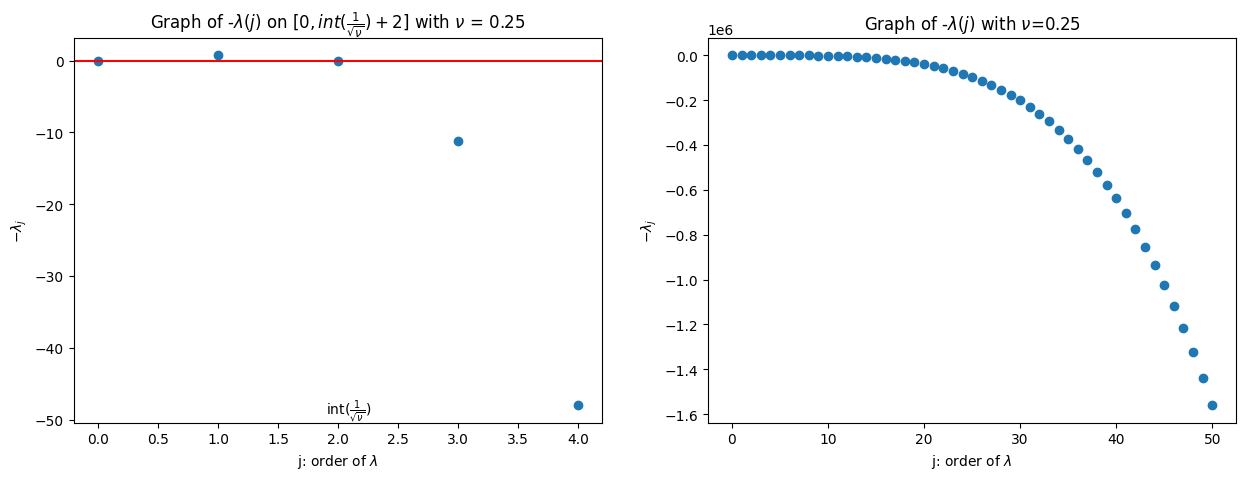

In [49]:
###Def and visualisation of the lambdas

##Definition
def lambda_fct(x):
    return nu*(x**4)-x**2

# lambda_arr = np.array([nu*n**4-n**2 for n in range(1, M+1)]) 
lambda_arr = lambda_fct(np.arange(1, M+1))
print("1/sqrt(nu): ", 1/np.sqrt(nu))



##Plot
#Plot of the polynomial -lambda_fct(X). The heighest root is at 1/sqrt(nu)
fig, axs = plt.subplots(1, 2, figsize= (15, 5))
N_arr_zoom = np.arange(0, int(1/np.sqrt(nu))+3)
# N_arr_zoom = np.arange(1, 11)
N_arr = np.arange(0, M+1)

#plot and title: The left graph to visualise when the sign change occurs. THe right graph to see the total range of the lambdas (all the frequencies)
axs[0].scatter(N_arr_zoom, -lambda_fct(N_arr_zoom))
axs[1].scatter(N_arr, -lambda_fct(N_arr))

axs[0].set_xlabel(r"j: order of $\lambda$")
axs[0].set_ylabel(r"$-\lambda_j$")
axs[0].set_title(r"Graph of -$\lambda(j)$ on $[0,int(\frac{1}{\sqrt{\nu}})+2]$ with $\nu$ = " + "{}".format(nu))

axs[1].set_xlabel(r"j: order of $\lambda$")
axs[1].set_ylabel(r"$-\lambda_j$")
axs[1].set_title(r"Graph of -$\lambda(j)$ with $\nu$" + "={}".format(nu))


#additional things on the graph
axs[0].axhline(y=0, color='r', linestyle='-') #draws a line at x=0 to see more clearly the sign of the points

y_min, y_max = axs[0].get_ylim() # Get current y-limits
y_coord = y_min + (y_max-y_min)/50 # Set y-coordinate for annotations (e.g., 10% above the bottom)
point_graph = np.array([int(1/np.sqrt(nu)), y_coord])
axs[0].annotate(r"int($\frac{1}{\sqrt{\nu}}$)", xy=point_graph, xytext = point_graph - (0.1, 0))


plt.show()

In [50]:
# with j = 1 to M+1
-lambda_arr

array([ 7.50000000e-01, -0.00000000e+00, -1.12500000e+01, -4.80000000e+01,
       -1.31250000e+02, -2.88000000e+02, -5.51250000e+02, -9.60000000e+02,
       -1.55925000e+03, -2.40000000e+03, -3.53925000e+03, -5.04000000e+03,
       -6.97125000e+03, -9.40800000e+03, -1.24312500e+04, -1.61280000e+04,
       -2.05912500e+04, -2.59200000e+04, -3.22192500e+04, -3.96000000e+04,
       -4.81792500e+04, -5.80800000e+04, -6.94312500e+04, -8.23680000e+04,
       -9.70312500e+04, -1.13568000e+05, -1.32131250e+05, -1.52880000e+05,
       -1.75979250e+05, -2.01600000e+05, -2.29919250e+05, -2.61120000e+05,
       -2.95391250e+05, -3.32928000e+05, -3.73931250e+05, -4.18608000e+05,
       -4.67171250e+05, -5.19840000e+05, -5.76839250e+05, -6.38400000e+05,
       -7.04759250e+05, -7.76160000e+05, -8.52851250e+05, -9.35088000e+05,
       -1.02313125e+06, -1.11724800e+06, -1.21771125e+06, -1.32480000e+06,
       -1.43879925e+06, -1.56000000e+06])

### Computation & Animation

#### Computation

In [51]:
##main loop

#Basic schemes (1-2-3)
A1_lambda = np.array([1-dt*lambda_arr[i] for i in range(len(lambda_arr))])
A2_lambda = np.array([(1+dt/nu)/(1+dt*lambda_arr[i]+dt/nu) for i in range(len(lambda_arr))])
B2_lambda = np.array([dt/(1+dt*lambda_arr[i]+dt/nu) for i in range(len(lambda_arr))])
A3_lambda = np.array([1/(1+dt*lambda_arr[i]) for i in range(len(lambda_arr))])

#Scheme in the paper (4)
def alpha_gamma_coef(_p):
    '''gives the coefficient of the polynomials alpha and gamma (cf paper Linear implicit methods... G. AKRIVIS ET AL., p.7 & in the appendix). 
    Output: (alpha_coef, gamma_coef) tuple of 2 np.array of size p. '''
    match _p:
        case 1:
            return (np.array([-1, 1]), np.array([1]))
        case 2:
            return (np.array([1/2, -2, 3/2]), np.array([-1, 2]))
        case 3:
            return (np.array([-1/3, 3/2, -3, 11/6]), np.array([1, -3, 3]))
        case 4:
            return (np.array([1/4, -4/3, 3, -4, 25/12]), np.array([-1, 4, -6, 4]))
        case 5:
            return (np.array([-1/5, 5/4, -10/3, 5, -5, 137/60]), np.array([1, -5, 10, -10, 5]))
        case 6:
            return (np.array([1/6, -6/5, 15/4, -20/3, 15/2, -6, 147/60]), np.array([-1, 6, -15, 20, -15, 6]))
        case _:
            raise Exception("Function alpha_gamma_coef: Error in the calculus, wrong p value.")


p=6 #No name in the paper. Order of the numerical scheme
alpha_coef, gamma_coef = alpha_gamma_coef(p)

A4_lambda = 1/((alpha_coef[-1]+dt/nu)*np.ones(M)+dt*lambda_arr) #prblm here
B4_lambda = (dt/nu*gamma_coef - alpha_coef[:-1])
Hc4_mat = np.zeros((N_t, len(H_c)))
Hs4_mat = np.zeros((N_t, len(H_s)))
Hc4_mat[0,:] = H_c
Hs4_mat[0,:] = H_s
Fc4_mat = np.zeros((N_t, len(H_c)))
Fs4_mat = np.zeros((N_t, len(H_s)))




##Calculus
t_i = time.time()

#1st scheme: Fully explicit
if bool_calculus_Fourier:
    if False:
        for n_t in range(1, N_t):
            F_c, F_s = F(H_c, H_s)
            if False: #1 Scheme: Fully explicit  
                H_c = A1_lambda*H_c + dt*F_c
                H_s = A1_lambda*H_s + dt*F_s
            elif True: #2 Scheme: Implicit-Explicit
                H_c = A2_lambda*H_c + B2_lambda*F_c
                H_s = A2_lambda*H_s + B2_lambda*F_s
            elif False:#3 Scheme: A bit more Implicit
                H_c = A3_lambda*H_c + dt*A3_lambda*F_c
                H_s = A3_lambda*H_s + dt*A3_lambda*F_s
            h_Fourier_mat[n_t, 1:] = (H_c - (1j)*H_s)/2 #Not taking the first element as it is the mean value supposed to be zero.

    elif True: #4th Scheme: The one in the paper
        for n_t in range(1, p): #Implicit-Explicit method until (p-1)dt
            Fc4_mat[n_t-1], Fs4_mat[n_t-1] = F(Hc4_mat[n_t-1], Hs4_mat[n_t-1])
            Hc4_mat[n_t] = A2_lambda*Hc4_mat[n_t-1] + B2_lambda*Fc4_mat[n_t-1]
            Hs4_mat[n_t] = A2_lambda*Hs4_mat[n_t-1] + B2_lambda*Fs4_mat[n_t-1]
            h_Fourier_mat[n_t, 1:] = (Hc4_mat[n_t] - (1j)*Hs4_mat[n_t])/2
            
        for n_t in range(0, N_t-p):
            Fc4_mat[n_t+p-1], Fs4_mat[n_t+p-1] = F(Hc4_mat[n_t+p-1], Hs4_mat[n_t+p-1])
            Hc4_mat[n_t+p] = A4_lambda*(B4_lambda@Hc4_mat[n_t:n_t+p] + dt*gamma_coef@Fc4_mat[n_t:n_t+p]) #Indexes from n_t to n_t+p-1
            Hs4_mat[n_t+p] = A4_lambda*(B4_lambda@Hs4_mat[n_t:n_t+p] + dt*gamma_coef@Fs4_mat[n_t:n_t+p])

            h_Fourier_mat[n_t+p, 1:] = ( Hc4_mat[n_t+p] - (1j)* Hs4_mat[n_t+p])/2 


t_f = time.time()

#Some checks
computation_time = t_f-t_i 
print("Computation duration: ", int(computation_time*100)/100)
print("number of non nan: ", np.count_nonzero(np.isnan(h_Fourier_mat)))
print("Maximum of the Fourier coef:", np.max(np.nan_to_num(h_Fourier_mat)), "\n")


# if save:    
#     np.savetxt('KS_eq_Fourier.txt', h_Fourier_mat, fmt='%d')
# else:
#     h_Fourier_mat = np.loadtxt('KS_eq_Fourier.txt', dtype=complex)

Computation duration:  21.02
number of non nan:  0
Maximum of the Fourier coef: (1.4003596020052533+0.17185755450228j) 



In [52]:
##Back to the height h with inverse FFT
for n_t in range(1, N_t):
    h_mat[n_t, :] = np.fft.irfft(h_Fourier_mat[n_t, :], norm="forward") #Same norm as the direct fft

#### Animation

In [53]:
bool_anim_Fourier = True #Compute & display the animation or not

In [54]:
#animation function
def func_anim_1(_time_series, _anim_space_array, _anim_time_array,
                 title, title_x_axis = None, title_y_axis= None, _legend_list = None,
                 bool_grid = False, _x_ticks_major = None):
    
    '''inputs:
        _time_series :The space-time functions. There can be many   ((N, N_t, N_x) array)
        _anim_space_array, _anim_time_array: time domain ((N_t) array), space domain ((N_x) array)
        title, title_x_axis, title_y_axis: explicit
        _legend_list: list of the legend of the graph corresponding to the space-time functions
        bool_grid: put a grid or not
        _x_ticks_major: display some specific values on the x-axis
        '''
    


    #(Nb_tab, N_t, N_x) tab
    Nb_time_series =  _time_series.shape[0]
    gap = (_time_series.max()- _time_series.min())/10

    #subplot initialisation
    fig, axs = plt.subplots(1, 1, figsize=(10, 4))


    # Initialise the plot ligns
    array_line_analytical = Nb_time_series*[0]
    for k in range(Nb_time_series):
        if not(_legend_list is None):
            array_line_analytical[k], = axs.plot([], [], label=_legend_list[k])
        else:
            array_line_analytical[k], = axs.plot([], [])

    axs.set_xlim([_anim_space_array.min(), _anim_space_array.max()])
    axs.set_ylim([_time_series.min()-gap, _time_series.max()+gap])

    if bool_grid:
        if _x_ticks_major is None:
            axs.set_xticks(_anim_space_array, minor=True)
            axs.grid(which='both')  # Major ticks for x-axis, every 1 unit
        else:
            axs.set_xticks(_x_ticks_major) #Major xticks : the one which is showed on the x axis
            axs.set_xticks(_anim_space_array, minor=True) #minor xticks
            axs.grid(which='both') #grid for the minor tick

    # Update the function in the animation
    def update(frame):
        t_1 = _anim_time_array[frame]
        y = np.array([_time_series[k][frame] for k in range(Nb_time_series)])
        for k in range(_time_series.shape[0]):
            array_line_analytical[k].set_data(_anim_space_array, y[k])
        
        axs.set_title(title + ' at t= {}'.format(t_1))
        axs.set_xlabel(title_x_axis)
        axs.set_ylabel(title_y_axis)

        if not(_legend_list is None):
            axs.legend()
        return array_line_analytical,

    # Create the animation
    # plt.close() #To avoid having another plot after the animation

    return FuncAnimation(fig, update, frames=len(_anim_time_array)-1)  



In [59]:
img_per_step = 25*8 #(total number of image)/(nb of image displayed) ratio. 
N_t_anim = int(N_t/img_per_step)

h_anim = np.array([h_mat[i] for i in range(len(h_mat)) if i%img_per_step==0])
print(h_anim.shape, h_mat.shape)


(50, 100) (10000, 100)


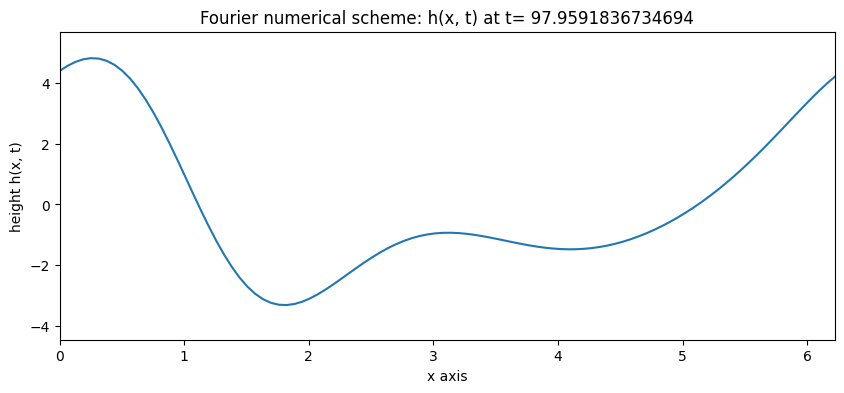

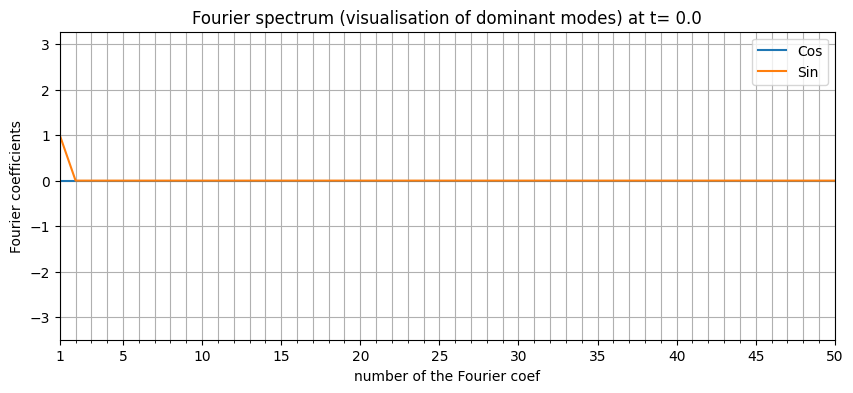

In [60]:
H_c_total = 2*h_Fourier_mat[:, 1:].real  #See the Obsidian file for justification.
H_s_total = -2*h_Fourier_mat[:, 1:].imag 
Time_array = np.linspace(start=0, stop=T, num=N_t, endpoint=True)


if bool_anim_Fourier:
    Time_array_anim = np.linspace(start=0, stop=T, num=N_t_anim, endpoint=True)
    # anim = func_anim(h_anim, dt_anim=dt_anim, title="Fourier numerical scheme: h(x, t)", title_x_axis="x axis", title_y_axis="height h(x, t)")
    # display(anim)
    anim_1 = func_anim_1(np.array([h_anim]), _anim_space_array=Domain_x, _anim_time_array = Time_array_anim,
                            title="Fourier numerical scheme: h(x, t)", title_x_axis="x axis", 
                            title_y_axis="height h(x, t)")
    anim_1.save("anim_KS_equation_Progressive_wave.mp4")
    display(HTML(anim_1.to_jshtml()))

    #plot of the IC in frequency domain
    H_c_total_anim = np.array([H_c_total[i] for i in range(len(h_mat)) if i%img_per_step==0])
    H_s_total_anim = np.array([H_s_total[i] for i in range(len(h_mat)) if i%img_per_step==0])
    
    #Animation of the Fourier coefficient
    anim_1 = func_anim_1(np.array([H_c_total_anim, H_s_total_anim]), _anim_space_array=fq_tab[1:], _anim_time_array = Time_array_anim,
                            title="Fourier spectrum (visualisation of dominant modes)", title_x_axis="number of the Fourier coef", 
                            title_y_axis="Fourier coefficients", _legend_list=["Cos", "Sin"],
                            bool_grid=True, _x_ticks_major = np.array([fq_tab[1]]+[fq_tab[i] for i in range(1, len(fq_tab)) if i%5==0]))
    display(HTML(anim_1.to_jshtml()))
    


### Results & Analysis

#### Visualisation of the different regimes

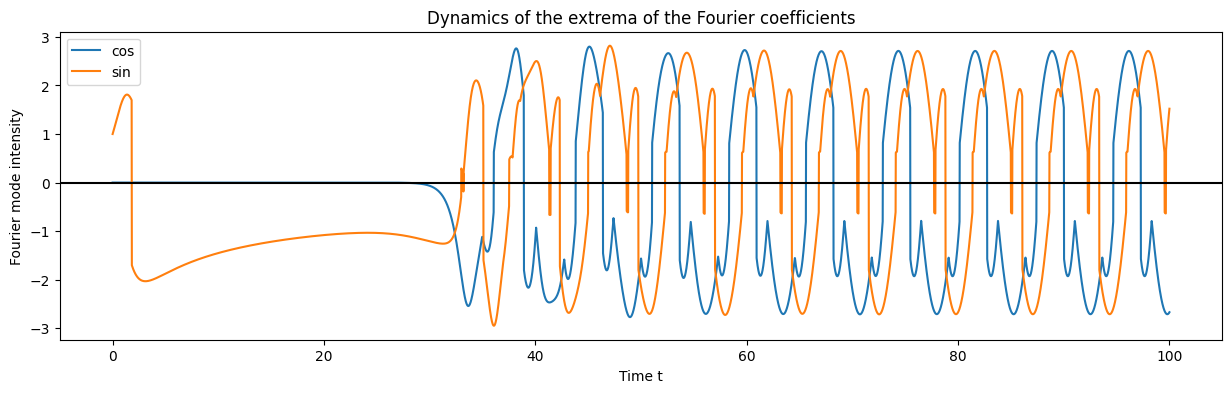

In [15]:
##Graph of the predominant Fourier cos and sin modes  
#I display the extrema with their respective sign (i.e not in absolute value) to spot the periodic behavior 
#which could be hidden/modified with absolute values (e.g having  f(fq, time) =f(1, 0) = 1, f(1, pi) = -1, f(1, 2pi) = 1  )

fig = plt.figure(figsize=(15, 4))
Hc_dom_indx_1 = np.argmax(np.absolute(H_c_total), axis=1)
Hs_dom_indx_1 = np.argmax(np.absolute(H_s_total), axis=1)

H_c_dominant = [H_c_total[i, Hc_dom_indx_1[i]] for i in range(N_t) ]
H_s_dominant = [H_s_total[i, Hs_dom_indx_1[i]] for i in range(N_t) ]


plt.plot(Time_array, H_c_dominant, label="cos")
plt.plot(Time_array, H_s_dominant, label="sin")
plt.xlabel("Time t")
plt.ylabel("Fourier mode intensity")

plt.axhline(y=0, color= "0", linestyle='-') #draws a line at x=0 to see more clearly the sign of the points
plt.title("Dynamics of the extrema of the Fourier coefficients")
plt.legend()
plt.show()

Study of $h_{max}$: Visualisation and slope measurements

In [16]:
###Computation of h_max

h_max_indx_1 = np.argmax(np.absolute(h_mat), axis=1)
# h_max = [h_mat[i, h_max_indx_1[i]] for i in range(N_t) ]
h_max = np.max(np.absolute(h_mat), axis=1)


###Computation of the border times
# Goal: see the limits of the regimes (linear, wave,...) with the derivative (code changes depending on the result graph) 

h_max_log_derivative = np.gradient(np.log(h_max), dt) # Compute the derivative using finite difference
h_max_log_derivative_2 = np.gradient(h_max_log_derivative, dt)


##Method of computation, downsides & Alternative method: 
#Finding/defining the border times by the moments when the derivative is null: downside, yields bad results in the linear regression as I go further the line.
#I would like to use when second derivative != 0 (i.e a curve change) but the 2nd der. seems to unstable numerically

k_1, k_2 = 0, 0
counter = 0
for k in range(len(Time_array)):
    if abs(h_max_log_derivative[k]) <= 1e-3 and counter!=0:
        k_2 = k
        break
    elif abs(h_max_log_derivative[k]) <= 1e-3: #counter = 0 then
        k_1=k
        counter+=1


t_1, t_2 = k_1*dt, k_2*dt

print(h_max_log_derivative)
print(t_1, t_2)



[ 0.7237642   0.71950187  0.71123806 ...  0.02477454  0.00328347
 -0.00739914]
2.0902090209020905 20.742074207420742


In [17]:
#Linear regression
t_1_reg, t_2_reg = t_1, t_2, # Better results when I take t_1 t_2 not in the border of the linear regime. 
N_1, N_2 = int(t_1_reg/T*N_t), int(t_2_reg/T*N_t)
x_lin_reg_array = Time_array[N_1:N_2].reshape(-1,1) #Necessary reshape for sklearn
y_lin_reg_array = np.log(h_max[N_1:N_2]).reshape(-1, 1)


reg = LinearRegression(fit_intercept=True).fit(x_lin_reg_array, y_lin_reg_array) #sklearn function

Reg_lin_coef_a , Reg_lin_coef_b= reg.coef_[0][0], reg.intercept_[0]

print("Slope coefficient(s) ax+b:", Reg_lin_coef_a, Reg_lin_coef_b)
print("Determination coefficient R²: ",reg.score(x_lin_reg_array, y_lin_reg_array))

Slope coefficient(s) ax+b: -0.04840373835742173 1.011491966727621
Determination coefficient R²:  0.883555311197329


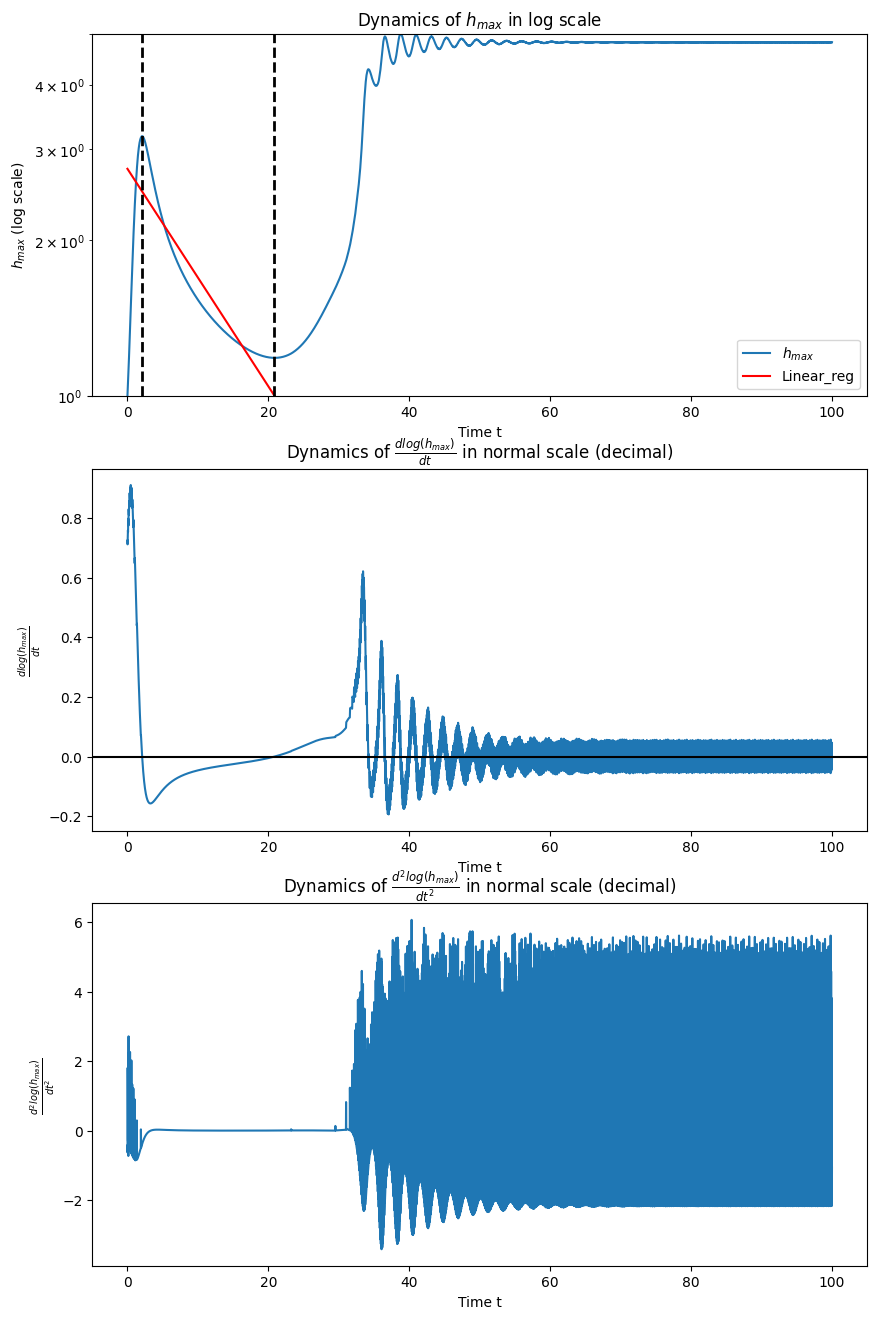

In [18]:
##Plot of h_max and its derivatives
#I display h_max to visualise the change in the system

fig, axs = plt.subplots(3, 1, figsize=(10, 16))

axs[0].plot(Time_array, h_max, label=r'$h_{max}$')
axs[0].plot(Time_array, np.exp(Reg_lin_coef_a*Time_array+Reg_lin_coef_b), color='r', label='Linear_reg')
axs[0].axvline(x=t_1, color='0', linestyle='--', linewidth=2)
axs[0].axvline(x=t_2, color='0', linestyle='--', linewidth=2)
axs[0].set_ylim(np.min(h_max), np.max(h_max))


axs[0].set_xlabel("Time t")
axs[0].set_ylabel(r"$h_{max}$ (log scale)")
axs[0].set_yscale("log")
axs[0].legend()
axs[0].set_title(r"Dynamics of $h_{max}$ in log scale")


axs[1].plot(Time_array, h_max_log_derivative)
axs[1].axhline(y=0, color= "0", linestyle='-') 
axs[1].set_xlabel("Time t")
axs[1].set_ylabel(r"$\frac{dlog(h_{max})}{dt}$ ")
axs[1].set_title(r"Dynamics of $\frac{dlog(h_{max})}{dt}$ in normal scale (decimal)")

axs[2].plot(Time_array, h_max_log_derivative_2)
axs[2].set_xlabel("Time t")
# axs[2].set_xlim(5, 25)
axs[2].set_ylabel(r"$\frac{d^2log(h_{max})}{dt^2}$ ")   
axs[2].set_title(r"Dynamics of $\frac{d^2log(h_{max})}{dt^2}$ in normal scale (decimal)")

plt.show()

#### Linear System & caracteristic decay time

In [19]:
#Theoretical time array initialisation & Computation of experimental characteristic time 

carac_time_array = 1/lambda_arr[1:] # withdraw the cases where lambda <=0
max_h_array = np.max(np.absolute(h_mat), axis=1)
idx_decay_time = -1

#Measurement of 5*caracteristic decay time. Reminder: 0.01%(~ exp(-5tau)) of the amplitude of the signal is reached at 5tau.
for k in range(len(max_h_array)):
    if max_h_array[k] < 0.01:
        idx_decay_time = k
        break

print("theoretical carac_time:", carac_time_array)
print(dt*idx_decay_time)

theoretical carac_time: [           inf 8.88888889e-02 2.08333333e-02 7.61904762e-03
 3.47222222e-03 1.81405896e-03 1.04166667e-03 6.41333975e-04
 4.16666667e-04 2.82545737e-04 1.98412698e-04 1.43446297e-04
 1.06292517e-04 8.04424334e-05 6.20039683e-05 4.85643174e-05
 3.85802469e-05 3.10373457e-05 2.52525253e-05 2.07558233e-05
 1.72176309e-05 1.44027365e-05 1.21406371e-05 1.03059581e-05
 8.80529727e-06 7.56823234e-06 6.54107797e-06 5.68248813e-06
 4.96031746e-06 4.34935309e-06 3.82965686e-06 3.38534063e-06
 3.00365244e-06 2.67428839e-06 2.38886978e-06 2.14054268e-06
 1.92366882e-06 1.73358522e-06 1.56641604e-06 1.41892426e-06
 1.28839415e-06 1.17253741e-06 1.06941807e-06 9.77391708e-07
 8.95056424e-07 8.21212746e-07 7.54830918e-07 6.95023993e-07
 6.41025641e-07]
-0.010001000100010001


C:\Users\Bilal_BM_user\AppData\Local\Temp\ipykernel_32840\1161568435.py:3: RuntimeWarning: divide by zero encountered in divide
  carac_time_array = 1/lambda_arr[1:] # withdraw the cases where lambda <=0


In [20]:
#Exp. measurement of 5tau with initial condition : Sin(2pifx) with f in range(2, 11). We devide by 5 to have tau

#nu = 1; fq in range(2, 11)
exp_carac_time_array_1 = (1/5)*np.array([0.38375000000000004, 0.06399, 0.019195, 0.007678, 0.0036544999999999998, 0.0019595, 0.001143, 0.0007109999999999999, 0.00046039999999999997])
#nu=1/2
exp_carac_time_array_2 = (1/5)*np.array([1.152, 0.14624, 0.04113000000000001, 0.016026000000000002, 0.0075239999999999994, 0.0040005, 0.0023211, 0.0014399999999999999 , 0.0009299999999999999])

#nu=1/4
# exp_carac_time_array_2 = (1/5)*np.array([1.152, 0.14624, 0.04113000000000001, 0.016026000000000002, 0.0075239999999999994, 0.0040005, 0.0023211, 0.0014399999999999999 , 0.0009299999999999999])

C:\Users\Bilal_BM_user\AppData\Local\Temp\ipykernel_32840\848332514.py:3: RuntimeWarning: invalid value encountered in divide
  arr_tau_errors = 100*np.absolute(exp_carac_time_array_2-carac_time_array[:9])/carac_time_array[:9]


relative errors in % compared to the linear theory for the 10 first tau: [       nan 67.096     60.5152    57.93175   56.66176   55.8944875
 55.43488   55.0936    55.36     ]
mean and standard deviation:  nan nan


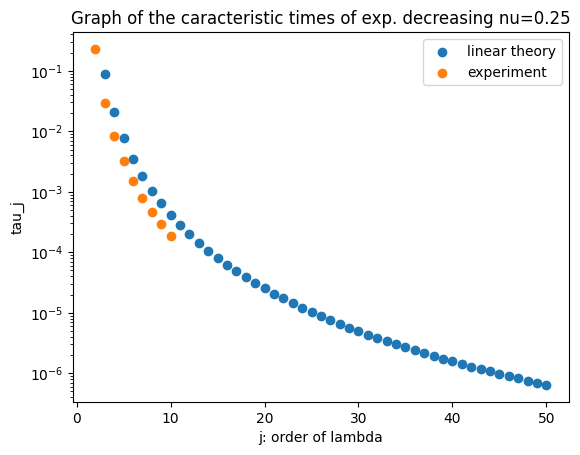

In [21]:
##Visualisation of experimental and theoretical tau. Comparison with relative error.

arr_tau_errors = 100*np.absolute(exp_carac_time_array_2-carac_time_array[:9])/carac_time_array[:9]
print("relative errors in % compared to the linear theory for the 10 first tau:", arr_tau_errors)
print("mean and standard deviation: ", np.mean(arr_tau_errors), np.std(arr_tau_errors))

plt.scatter(np.arange(2, M+1), carac_time_array, label = "linear theory")
plt.scatter(np.arange(2, 10+1), exp_carac_time_array_2, label = "experiment")

plt.legend()
plt.xlabel("j: order of lambda")
plt.ylabel("tau_j")
plt.yscale("log")
plt.title("Graph of the caracteristic times of exp. decreasing nu={}".format(nu))
plt.show()

## Finite Differences Method

In [22]:
def matrix_maker(coef_list, N=N_x):
    '''input: coef_list: list of int; N: size of the matrix
       output:
        Create a matrix whose (sub/sup) diagonal elements are precised by coef_list.
        example: coef_list[0]: main diag elts; coef_list[1]: sub diag, coef_list[2]: sup diag, coef_list[3]: second sub diag etc..
        '''
    
    assert (len(coef_list) > 0), "fct matrix_maker: len(coef_list) <= 0"
    output_mat = np.identity(N)*coef_list[0]

    for k in range(1,len(coef_list)):
        nb_diag = (-1)**(k%2)*((k+1)//2)
        for i in range(N):
            output_mat[i, (i+nb_diag)%N] = coef_list[k]
    
    return output_mat


mat_test = matrix_maker([6, 4, -4, 1, -1], N = 7)
print(mat_test)


[[ 6. -4. -1.  0.  0.  1.  4.]
 [ 4.  6. -4. -1.  0.  0.  1.]
 [ 1.  4.  6. -4. -1.  0.  0.]
 [ 0.  1.  4.  6. -4. -1.  0.]
 [ 0.  0.  1.  4.  6. -4. -1.]
 [-1.  0.  0.  1.  4.  6. -4.]
 [-4. -1.  0.  0.  1.  4.  6.]]


In [23]:
Df_4 = matrix_maker([6, -4, -4, 1, 1])
# Df_4 = matrix_maker([1, 0, -4, 0, 6, 0, -4, 0, 1])
Df_2 = matrix_maker([-2, 1, 1])
Df_1 = matrix_maker([-1, 0, 1])

Df_mat = np.linalg.inv(np.identity(N_x) + dt*((1/dx)**4*Df_4 + (1/dx)**2*Df_2))


In [24]:
#Verification of stability (maybe works even with non linear prblms)
print(np.max(np.linalg.eig(Df_4)[0]), np.min(np.linalg.eig(Df_4)[0]))
print(np.max(np.linalg.eig(Df_2)[0]), np.min(np.linalg.eig(Df_2)[0]))
print(np.max(np.absolute(np.linalg.eig(Df_mat)[0])))

(15.999999999999977+0j) (-5.34323212547386e-16+0j)
-2.2205751450928797e-15 -3.9999999999999933
1.000198193610446


In [25]:
bool_calculus_FD = False

if bool_calculus_FD:
    for n_t in range(1,N_t):
        h_mat[n_t, :] = Df_mat@( (np.ones(N_x)-(dt/dx)*Df_1)@h_mat[n_t-1, :])

### Animation

In [26]:
bool_anim_DF = False

In [27]:
img_per_step = 250
dt_anim = img_per_step*dt
h_anim_Df = np.array([h_mat[i] for i in range(len(h_mat)) if i%img_per_step==0])
print(h_anim_Df.shape, h_anim_Df.shape)

(40, 100) (40, 100)


In [28]:
if bool_anim_DF:
    anim = func_anim(h_anim, dt_anim=dt_anim, title="Finite difference scheme: h(x, t)", title_x_axis="x axis", title_y_axis="height h(x, t)")
    display(anim)